# C S 509 HW1

Author: **Indronil Bhattacharjee**

Submitted on: **September 5, 2023**

## Task 2.1: Function f1() to Subtract Numeric Vectors using Loop

In [1]:
f1 <- function(x, y) {
  n <- length(x)
  z <- numeric(n)
  for (i in 1:n) {
    z[i] <- x[i] - y[i]
  }
  return(z)
}

## Task 2.2: Function f2() to Subtract Numeric Vectors with Vectorized Operation

In [2]:
f2 <- function(x, y) {
  z <- x - y
  return(z)
}

## Task 2.3: Comparing Runtimes and Testing Equality

In [3]:
library(testthat)

# Create vectors x and y of length 1,000,000
x <- rnorm(1000000)
y <- rnorm(1000000)

# Measure runtime and test equality
t1 <- system.time(f1(x, y))[1]
t2 <- system.time(f2(x, y))[1]

z_loop <- f1(x, y)
z_vectorized <- f2(x, y)

# Print Outputs
expect_equal(z_loop, z_vectorized)

# Print runtimes
print(paste("Runtime f1:", t1))
print(paste("Runtime f2:", t2))

[1] "Runtime f1: 0.153"
[1] "Runtime f2: 0.00100000000000011"


In [4]:
plot.runtime <- function(ns, t.loop, t.vectorized)
{
  plot(ns, t.loop, ylim=c(0, max(t.loop)), col="red3", 
       type="b", panel.first=grid(), lwd=2,
       xlab="Input vector length",
       ylab="Time (millisecond)")
  lines(ns, t.vectorized, col="royalblue", type="b", lwd=2)
  legend("topleft", c("for-loop", "vectorized"), 
         col=c("red3", "royalblue"), lwd=1)
}

## Task 2.4: Plotting runtime difference

Runtimes for 100, 1000 and 10000 elements

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



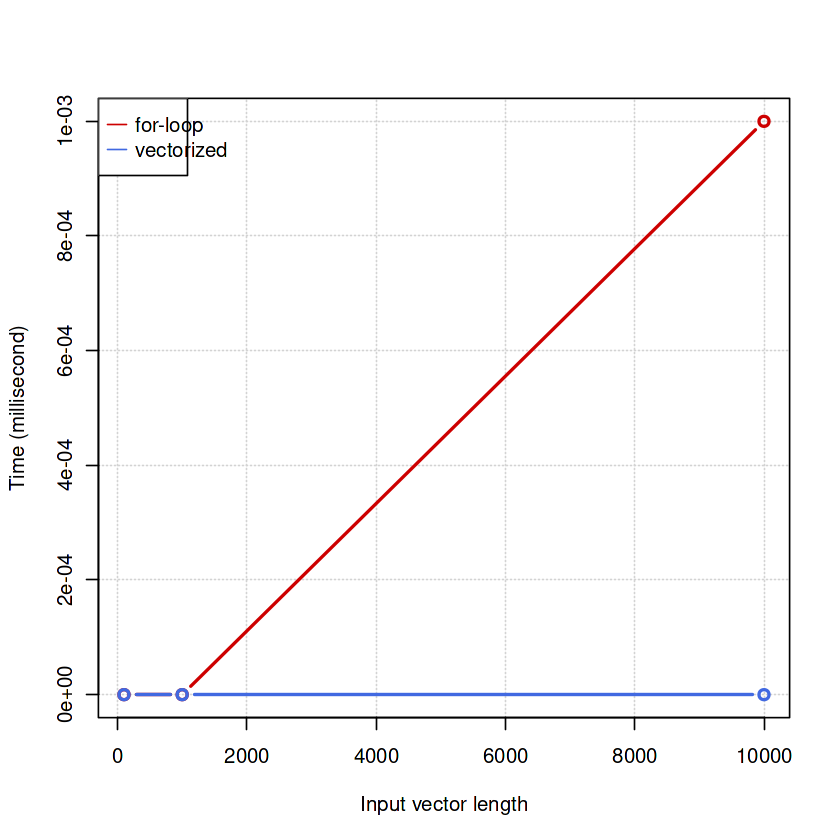

In [5]:
library(forecast)
ns <- c(100, 1000, 10000)  # Varying input lengths
t.loop <- numeric(length(ns))
t.vectorized <- numeric(length(ns))

for (i in 1:length(ns)) {
  x <- rnorm(ns[i])
  y <- rnorm(ns[i])
  
  t.loop[i] <- system.time(f1(x, y))[1]
  t.vectorized[i] <- system.time(f2(x, y))[1]
}

plot.runtime(ns, t.loop, t.vectorized)

Runtimes for 10000, 100000 and 1000000 elements

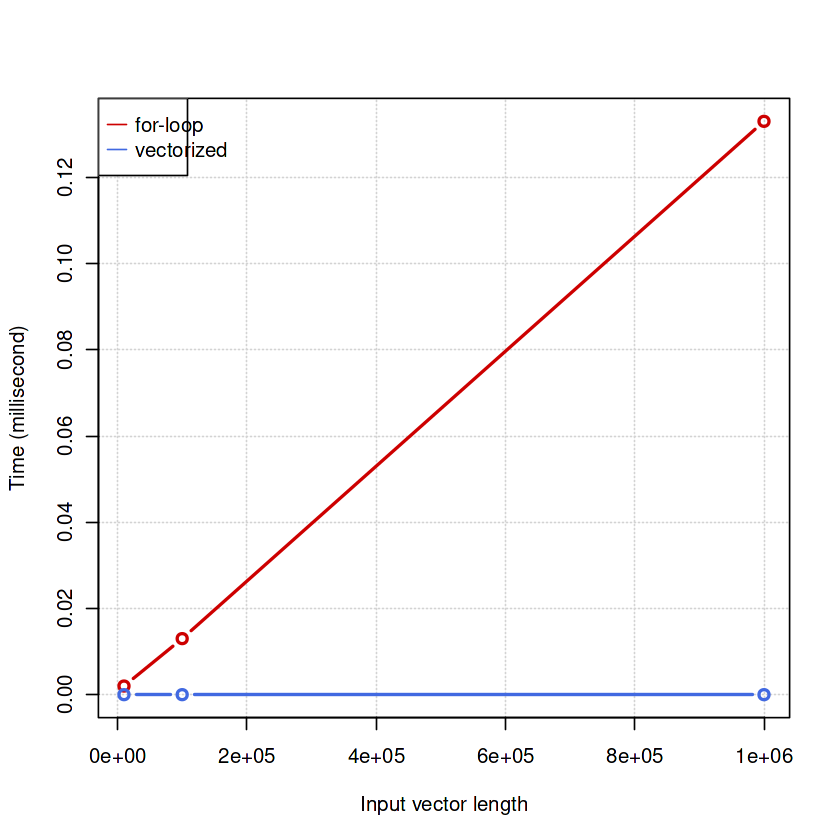

In [6]:
library(forecast)
ns <- c(10000, 100000, 1000000)  # Varying input lengths
t.loop <- numeric(length(ns))
t.vectorized <- numeric(length(ns))

for (i in 1:length(ns)) {
  x <- rnorm(ns[i])
  y <- rnorm(ns[i])
  
  t.loop[i] <- system.time(f1(x, y))[1]
  t.vectorized[i] <- system.time(f2(x, y))[1]
}

plot.runtime(ns, t.loop, t.vectorized)

## Task 2.5: Projecting runtime for 10 billion elements

In [13]:
library(forecast)
ns <- c(10000000, 100000000, 1000000000)  # Varying input lengths
t.loop <- numeric(length(ns))
t.vectorized <- numeric(length(ns))

for (i in 1:length(ns)) {
  x <- rnorm(ns[i])
  y <- rnorm(ns[i])
  
  t.loop[i] <- system.time(f1(x, y))[1]
  t.vectorized[i] <- system.time(f2(x, y))[1]
}

In [14]:
t1 <- t.loop[1]
t2 <- t.loop[2]
t3 <- t.loop[3]
print(paste(t1,t2,t3))

tv1 <- t.vectorized[1]
tv2 <- t.vectorized[2]
tv3 <- t.vectorized[3]
print(paste(tv1,tv2,tv3))

[1] "1.31799999999998 13.828 131.96"
[1] "0.0120000000000005 0.120000000000005 1.22500000000002"


In [15]:
# Calculate the average ratio of runtime increase with each order of magnitude
ratio_loop <- ((t2 / t1) + (t3 / t2)) / 2

# Estimate the runtime for 10 billion elements
estimated_10_billion <- t3 * ratio_loop # Extrapolate by adding 4 orders of magnitude

# Print the estimated runtime
print(paste("Estimated runtime for 10 billion elements:", estimated_10_billion))

[1] "Estimated runtime for 10 billion elements: 1321.8835903489"


In [16]:
# Calculate the average ratio of runtime increase with each order of magnitude
ratio_vec <- ((tv2 / tv1) + (tv3 / tv2)) / 2

# Estimate the runtime for 10 billion elements
estimated_v_10_billion <- tv3 * ratio_vec # Extrapolate by adding 4 orders of magnitude

# Print the estimated runtime
print(paste("Estimated runtime for 10 billion elements:", estimated_v_10_billion))

[1] "Estimated runtime for 10 billion elements: 12.3776041666668"


In [17]:
time_saved_with_vectorized = estimated_10_billion - estimated_v_10_billion
print(time_saved_with_vectorized)

[1] 1309.506


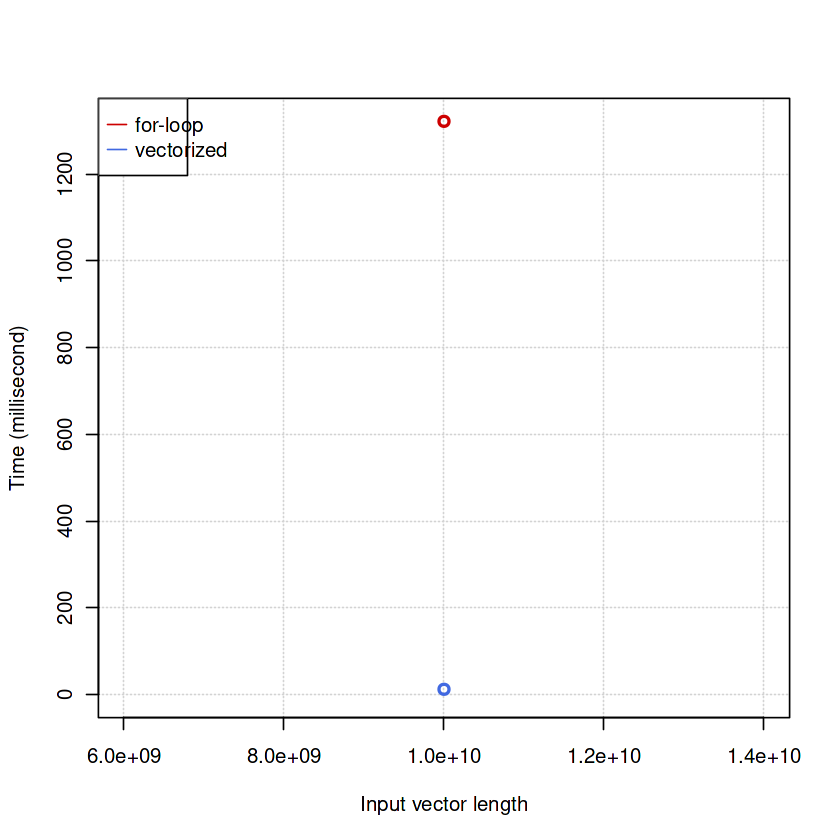

In [18]:
plot.runtime(10000000000, estimated_10_billion, estimated_v_10_billion)